In [30]:
import pandas as pd
import numpy as np 
from datetime import datetime, timedelta


In [2]:
df = pd.read_csv('Data/macrodata.csv', index_col=0, parse_dates=True)

In [3]:
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


<Axes: >

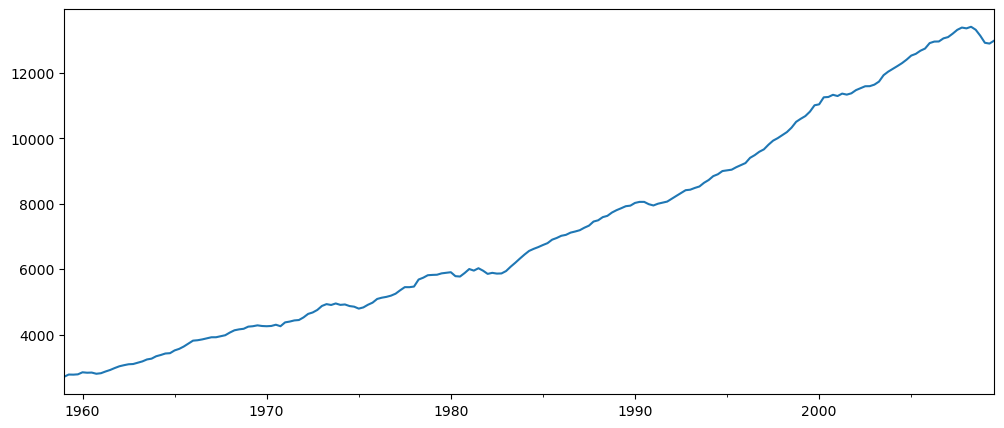

In [4]:
df['realgdp'].plot(figsize=(12,5))

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [6]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [9]:
type(gdp_cycle)

pandas.core.series.Series

<Axes: >

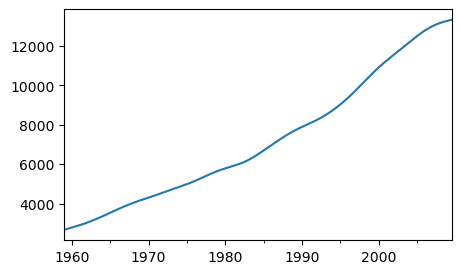

In [10]:
gdp_trend.plot(figsize=(5,3))

<Axes: >

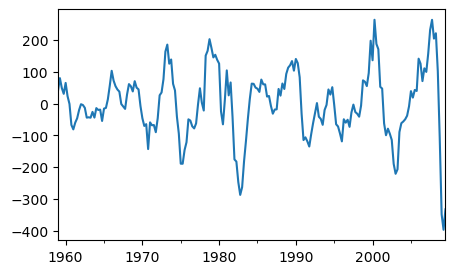

In [12]:
gdp_cycle.plot(figsize=(5,3))

In [13]:
df['trend'] = gdp_trend

In [14]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


<Axes: >

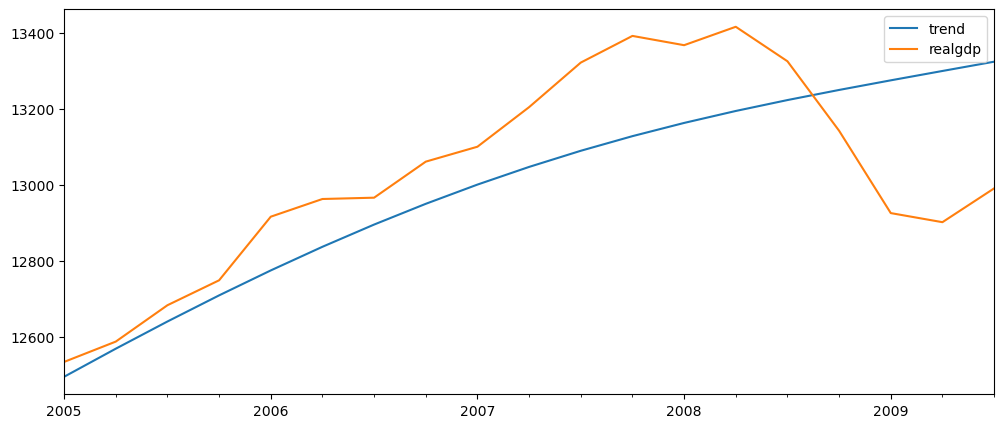

In [15]:
df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

In [31]:
# ETS Decomposition
# ETS(Error-Trend-Seasonality)
airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)


In [32]:
airline = airline.dropna()

In [33]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

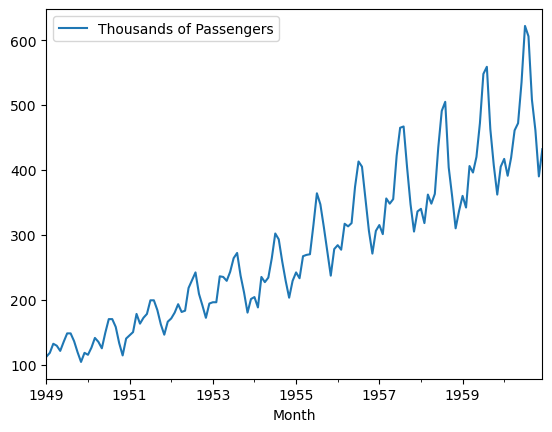

In [19]:
airline.plot()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')

<Axes: xlabel='Month'>

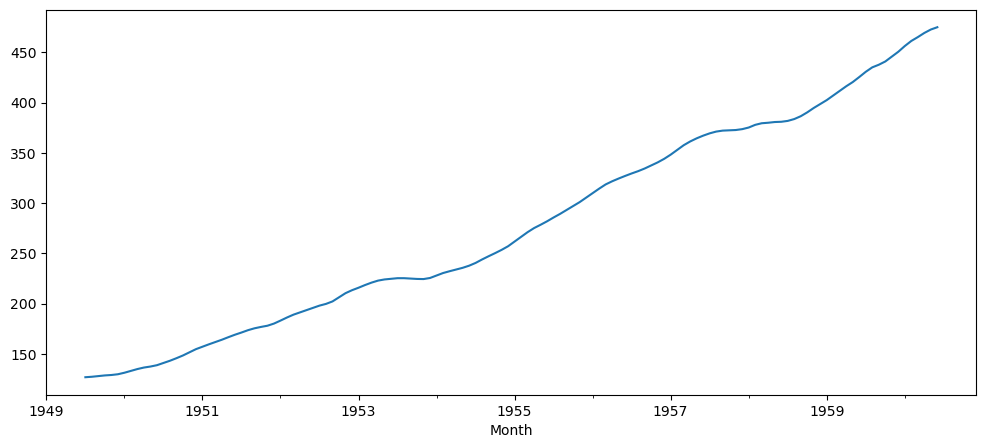

In [21]:
result.trend.plot(figsize=(12,5))

<Axes: xlabel='Month'>

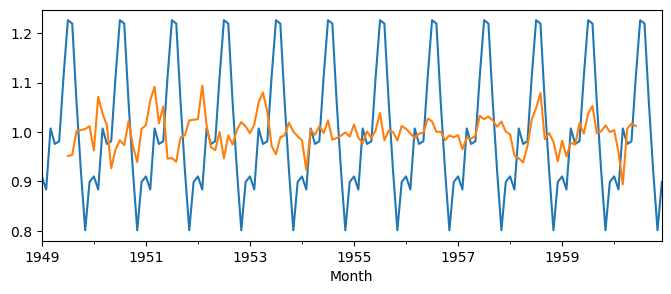

In [22]:
from pylab import  rcParams
rcParams['figure.figsize'] = 8, 3
result.seasonal.plot()
result.resid.plot()

<Axes: xlabel='Month'>

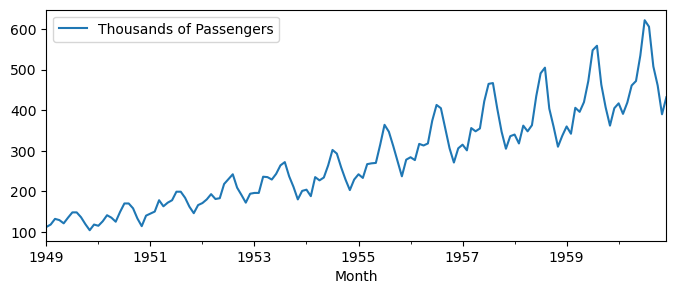

In [48]:
# EWNA Model (Exponetially Weighted Moving Average)
# SMA (Simple Moving Average) has weakness: It will never reach to the full peak or valley of the data due to the averaging
# Key idea of EWMA: Give more weight to the recent data and less weight to the older data

airline = pd.read_csv('Data/airline_passengers.csv', index_col='Month')
airline = airline.dropna()
airline.index = pd.to_datetime(airline.index)
airline.plot()

<Axes: xlabel='Month'>

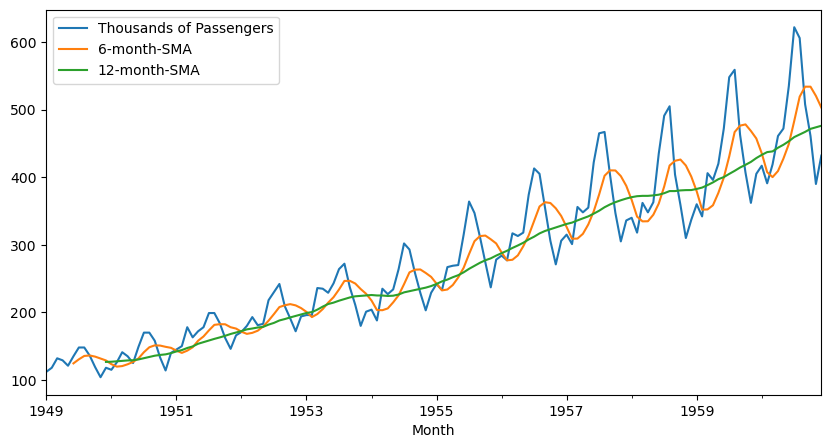

In [49]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()  
airline.plot(figsize=(10, 5))

<Axes: xlabel='Month'>

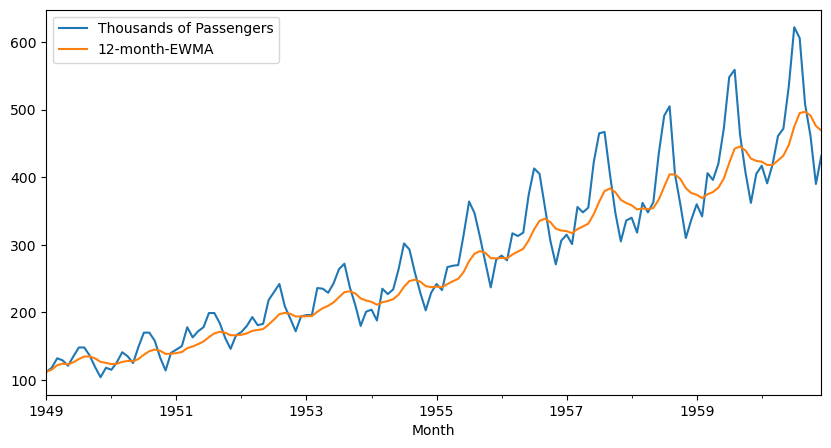

In [54]:
airline['12-month-EWMA'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline[['Thousands of Passengers', '12-month-EWMA']].plot(figsize=(10, 5))